# LAB-02


# SAI TEJA

# Question1

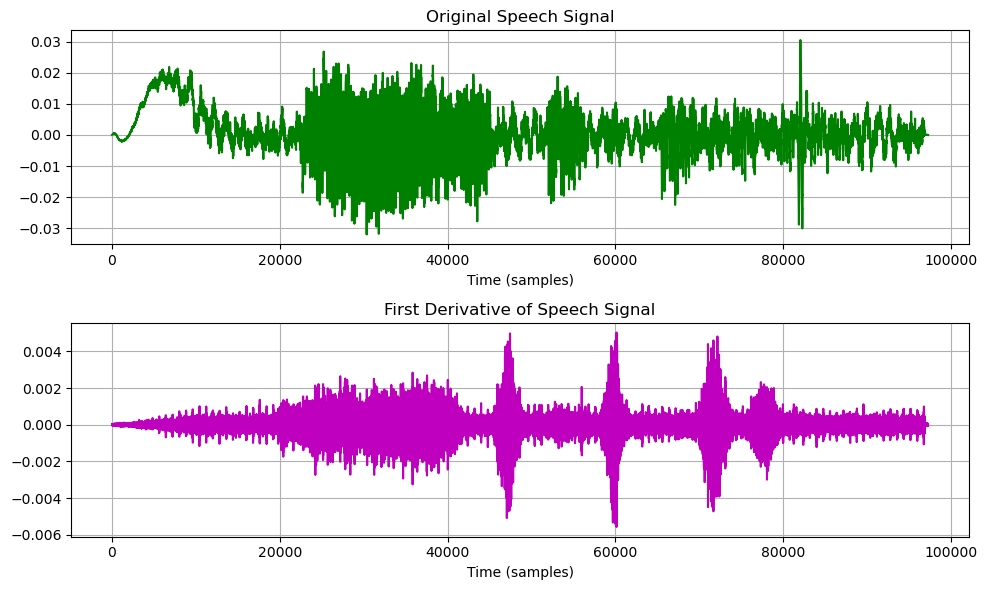

In [1]:
#ManuaL Method to Find the first derivative of your speech signal with finite differencemethod.
#Listen to the first derivative signal and the original speech signal.

import numpy as np
import matplotlib.pyplot as plt
import librosa
import sounddevice as sd

# Load the speech signal
y, sr = librosa.load(r"C:\Users\ADMIN\Downloads\LAB1.wav", sr=None)
# Compute the first derivative using finite difference method
delta_f = np.zeros_like(y)
delta_f[0] = y[1] - y[0]
delta_f[-1] = y[-1] - y[-2]
for i in range(1, len(y) - 1):
    delta_f[i] = y[i-1] + y[i+1] - 2*y[i]
# Plot the original and derivative signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(y, 'g')
plt.title('Original Speech Signal')
plt.xlabel('Time (samples)')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(delta_f, 'm')
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (samples)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [2]:
# Play original speech signal
print("Original speech signal")
sd.play(y, sr)
sd.wait()

Original speech signal


In [3]:
# Play first derivative of speech signal
print("First derivative of speech signal")
sd.play(delta_f, sr)
sd.wait()

First derivative of speech signal


# Question2

In [4]:
#Detect the points of zero crossing in the first derivative signal. 
#Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

import numpy as np
import librosa
y, sr = librosa.load(r"C:\Users\ADMIN\Downloads\LAB1.wav", sr=None)

# Compute the first derivative using finite difference method
dy_dt = np.diff(y)

# Find the points of zero crossing in the first derivative signal
zero_crossings = np.where(np.diff(np.sign(dy_dt)))[0]
speech_regions = []  
silence_regions = []

for i in range(len(zero_crossings) - 1):
    start_idx = zero_crossings[i]
    end_idx = zero_crossings[i + 1]
    region = dy_dt[start_idx:end_idx]
    if np.mean(region) > 0.1:  # Adjust the threshold based on your signal
        speech_regions.append(region)
    else:
        silence_regions.append(region)

# Calculate the average length between consecutive zero crossings in speech and silence regions
avg_length_speech = np.mean([len(region) for region in speech_regions])
avg_length_silence = np.mean([len(region) for region in silence_regions])

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)


Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 3.129290654656587


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Question3

The length Duration of first audio file: 4.714693877551021 seconds
The length Duration of Second audio file: 4.245351473922902 seconds


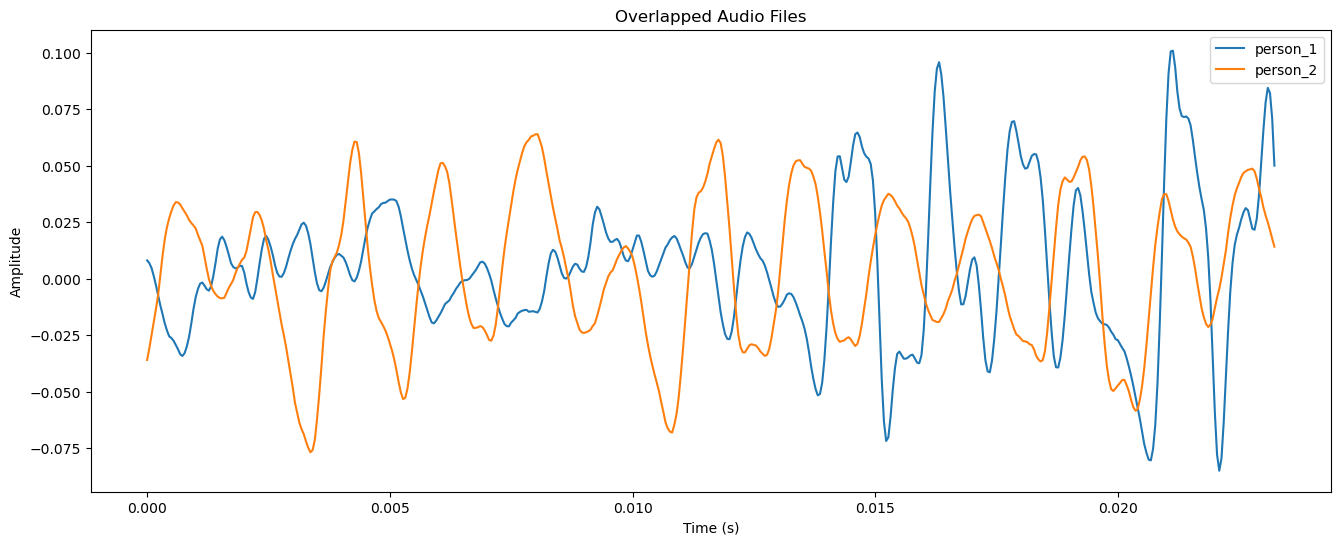

In [5]:
#Speak 5 of your favoritewords. 
#Observe the length of the speech signals. Compare the lengths of your spoken words with those of your projectteam-mate.

import librosa
import numpy as np
import matplotlib.pyplot as plt

person_1 = r"C:\Users\ADMIN\Downloads\sai1.mp3"
person_2 = r"C:\Users\ADMIN\Downloads\tarun.mp3"


# Load audio signals
y1, sr1 = librosa.load(person_1)
y2, sr2 = librosa.load(person_2)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
person_1_trimmed = remove_silence(y1, sr1)
person_2_trimmed = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(person_1_trimmed) / sr1, len(person_1_trimmed))
time2 = np.linspace(0, len(person_2_trimmed) / sr2, len(person_2_trimmed))

# Plot the trimmed audio files
plt.figure(figsize=(16, 6))
plt.plot(time1, person_1_trimmed, label='person_1')
plt.plot(time2, person_2_trimmed, label='person_2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()


# Question4

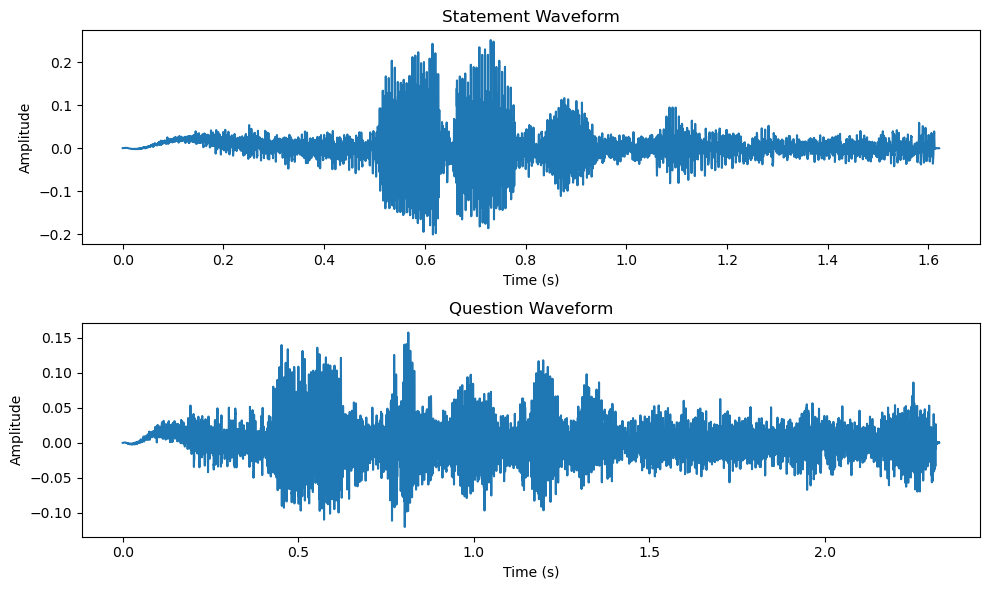

In [6]:
statement_file = r"C:\Users\ADMIN\Downloads\whereareyoufrom.mp3"
question_file = r"C:\Users\ADMIN\Downloads\hyderabad.mp3"

statement_signal, sr_statement = librosa.load(statement_file)  # Load audio signals
question_signal, sr_question = librosa.load(question_file)

# Calculate time axes for the signals
time_statement = np.arange(len(statement_signal)) / sr_statement
time_question = np.arange(len(question_signal)) / sr_question

# Plot waveforms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time_statement, statement_signal)
plt.title('Statement Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time_question, question_signal)
plt.title('Question Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
